In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [84]:
train=pd.read_csv("../Pictures/train.csv")
test=pd.read_csv("../Pictures/test.csv")
X1=train.values
X2=test.values
print(X1.shape,X2.shape)

(700, 2) (300, 2)


In [85]:
x_train=X1[:200,:-1]
y_train=X1[:200,-1]
print(x_train.shape,y_train.shape)
m=x_train.shape[0]
m

(200, 1) (200,)


200

In [93]:
x_test=X2[:,:-1]
y_test=X2[:,-1]
x=x_test[:200,:]
x=(x-x.mean())/x.std()
print(x_test.shape,y_test.shape)

(300, 1) (300,)


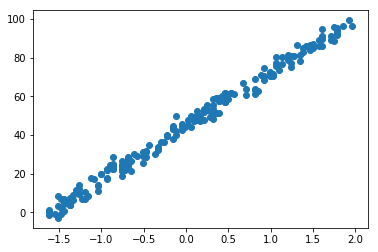

In [94]:

X=(x_train-x_train.mean())/x_train.std()
Y=y_train
plt.scatter(X,Y)

In [95]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x


def gradd(X,Y,theta):
    
    grad=np.zeros((2,))
    
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += hx-Y[i]
        grad[1] += (hx-Y[i])*X[i]
    
    return grad


def error(x,y,theta):
    err=0
    for i in range(m):
        err+=(hypothesis(x[i],theta)-y[i])**2
    return err


def gradientdescent(X,Y,lr=0.001):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(80):
        gradient=gradd(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-lr*gradient[0]
        theta[1]=theta[1]-lr*gradient[1]
    return theta,error_list



In [96]:
final_theta,error=gradientdescent(X,Y)
print(final_theta)

[44.98691398 27.74885412]


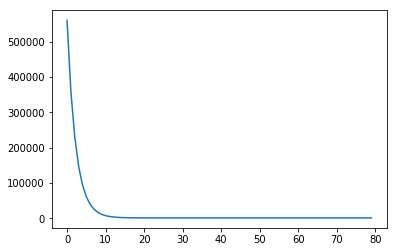

In [97]:
plt.plot(error)

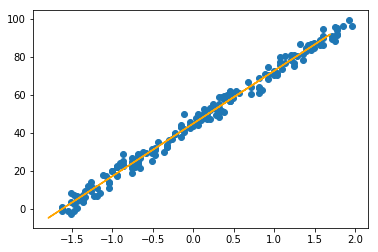

In [98]:
plt.scatter(X,Y)
plt.plot(x,hypothesis(x,final_theta),color='orange')